# Welcome to the RunHub ML Algorithm that predicts what your running schedule looks like!

## Load and Check User Data

In [1]:
# pip install matplotlib
# pip install numpy
# pip install pandas
# pip install calplot

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x2203.2 with 19 Axes>,
 array([<AxesSubplot:ylabel='1999'>, <AxesSubplot:ylabel='2000'>,
        <AxesSubplot:ylabel='2001'>, <AxesSubplot:ylabel='2002'>,
        <AxesSubplot:ylabel='2003'>, <AxesSubplot:ylabel='2004'>,
        <AxesSubplot:ylabel='2005'>, <AxesSubplot:ylabel='2006'>,
        <AxesSubplot:ylabel='2007'>, <AxesSubplot:ylabel='2008'>,
        <AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

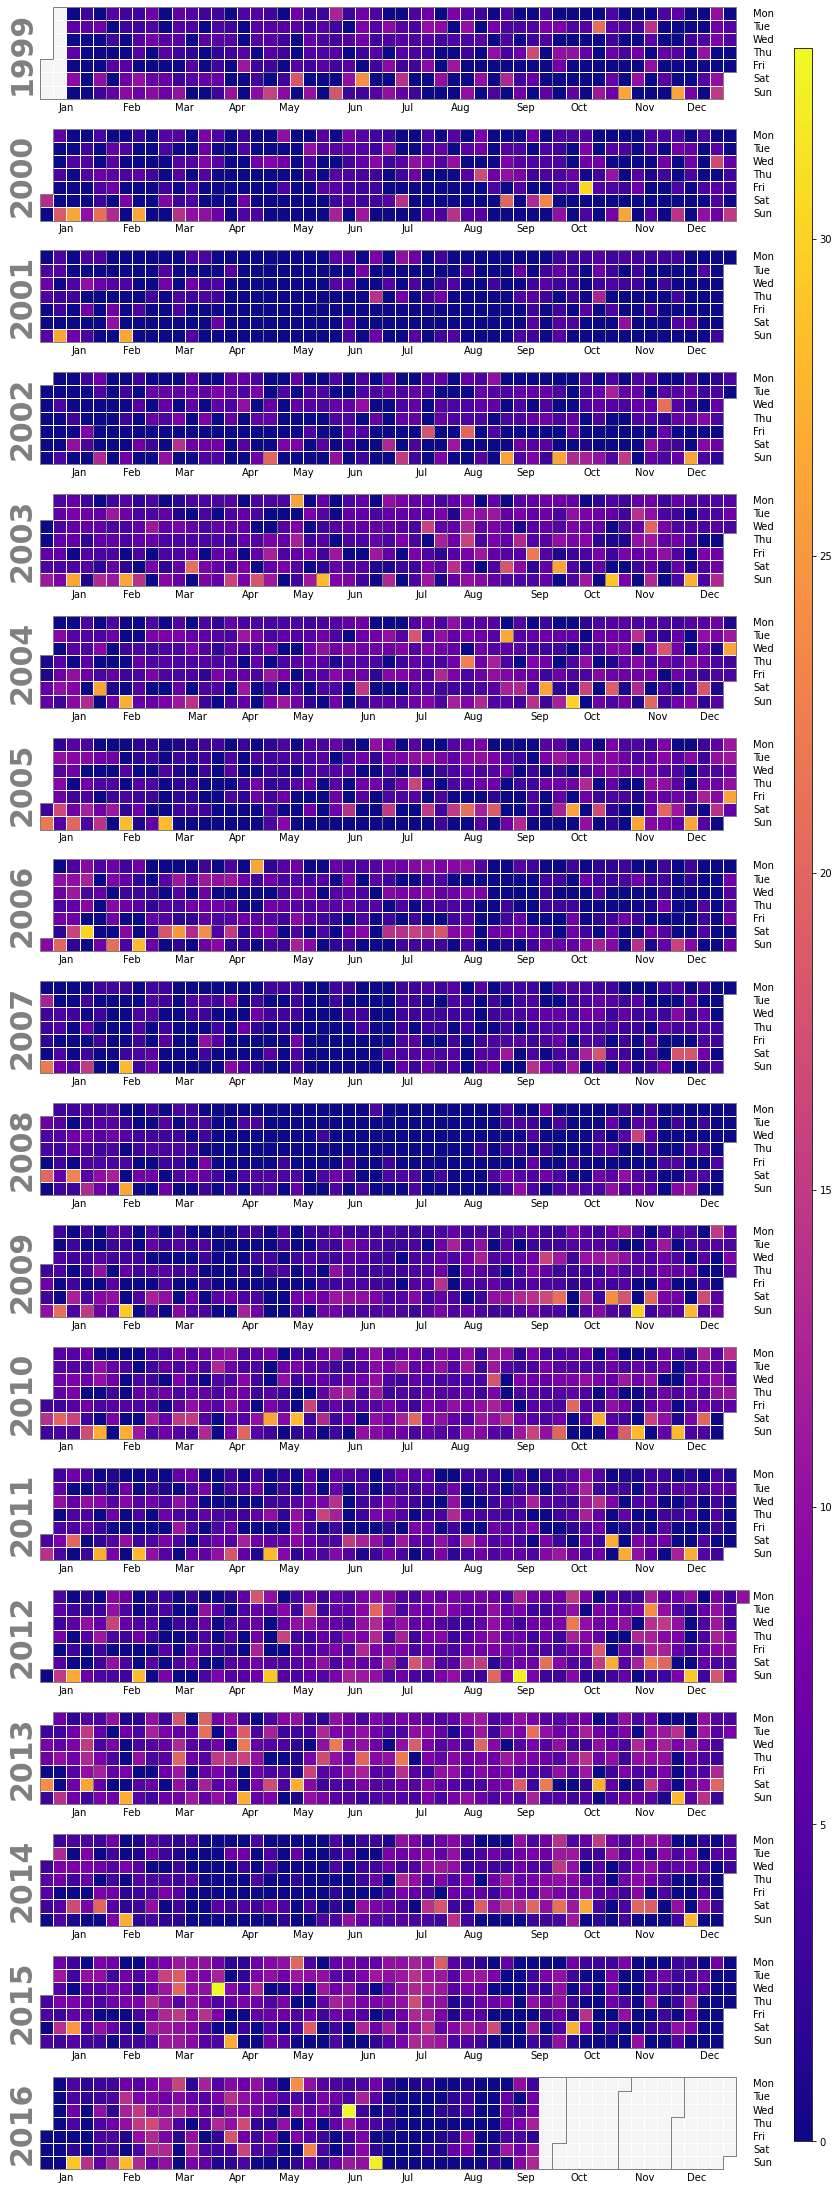

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calplot

df = pd.read_csv("Miles.csv")
df = df.dropna(axis=1)

date_time = []
for row in df.values:
    date_time += [str(row[0]) + '-' + str(row[1]) + '-' + str(row[2])]

format = "%Y-%m-%d"
df["Calendar Date"] = pd.to_datetime(date_time, format=format)
df = df.drop(["Year", "Month", "Date"], axis=1)

dataset = df

df = df.set_index(pd.DatetimeIndex(df['Calendar Date']))
df = df.drop("Calendar Date", axis=1)


cal_df = pd.Series(df["Miles"])
calplot.calplot(cal_df, cmap="plasma")

## Create Machine Learning Model to Analyze Running Schedule

### Install Seaborn

In [3]:
# pip install -q seaborn
import seaborn as sns

### Import TensorFlow

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


2.7.0


### Create Training Dataset

In [13]:
train_dataset = dataset.sample(frac=0.6, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# print(train_dataset)

Day
Miles
Calendar Date


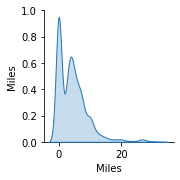

In [7]:
sns.pairplot(train_dataset[["Miles"]], diag_kind="kde")